In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Question 1

def create_incidence_matrix(edges):
    L = edges.shape[1]
    N = int(np.max(edges)) + 1
    inc = np.zeros((N, L))
    for i in range(edges.shape[0]):
        for j in range(L):
            inc[edges[i][j],j] = 2 * i - 1
    
    return inc

edges = np.array([
    [1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 6, 6],
    [3, 4, 7, 3, 5, 8, 9, 4, 5, 6, 6, 9, 10]
]) - 1 # since computer uses 0 as first index

# TODO: solve the problem!
incidence_matrix = create_incidence_matrix(edges)
N = 10
K = 4
a1 = incidence_matrix.T[:,0:N-K]
A1 = np.vstack([np.hstack([a1, np.zeros_like(a1)]), np.hstack([np.zeros_like(a1), a1])])
a2 = incidence_matrix.T[:,N-K:]
A2 = np.vstack([np.hstack([a2, np.zeros_like(a2)]), np.hstack([np.zeros_like(a2), a2])])
x1 = np.array([0, 0, 1, 1, 0, 1, 1, 0])
b = -A2 @ x1.T
x = np.linalg.inv(A1.T @ A1) @ (A1.T @ b)
x.reshape(2, -1).T

array([[0.35531136, 0.34798535],
       [0.53113553, 0.7985348 ],
       [0.51282051, 0.56410256],
       [0.55311355, 0.47985348],
       [0.61172161, 0.63003663],
       [0.79120879, 0.52747253]])

In [3]:
# Question 2

def richardson_iteration(A, b):
    x = np.random.rand(A.shape[1], 1)
    x_save = [x] # keeps track of x, we use it later to plot the convergence
    num_iter = 300
    
    for i in range(num_iter):
        # TODO: fill!
        x = x - A.T @ ((A @ x) - b) / np.linalg.norm(A)**2
        x_save.append(x)
    return x, x_save

C:\Users\eagle\anaconda3\envs\sypark\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


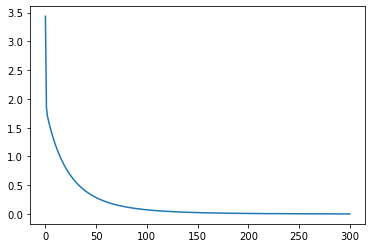

In [4]:
m, n = 20, 10
A = np.random.rand(m, n)
b = np.random.rand(m, 1)
x_hat, _, _, _ = np.linalg.lstsq(A, b) # numpy least squares
x_iterative, x_save = richardson_iteration(A, b)
x_hat = x_hat.reshape(1, -1)
x_save = np.array(x_save).reshape(-1, n)
diff = np.sum((x_save - x_hat)**2, axis=1)
plt.plot(np.arange(diff.shape[0]), diff)
plt.show()